<a href="https://colab.research.google.com/github/IslamTayeb/life-edit-gene-classifier/blob/main/Code/NLP/LifeEdit_NLP_Gene_Description_Processor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
raw_annotation = pd.read_csv("/content/drive/MyDrive/LifeEdit Personal/Human.GRCh38.p13.annot.tsv", sep = '\t')

<ipython-input-3-fc0d9f0bafd2>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_annotation = pd.read_csv("/content/drive/MyDrive/LifeEdit Personal/Human.GRCh38.p13.annot.tsv", sep = '\t')


In [4]:
raw_annotation

,GeneID,Symbol,Description,Synonyms,GeneType,EnsemblGeneID,Status,ChrAcc,ChrStart,ChrStop,Orientation,Length,GOFunctionID,GOProcessID,GOComponentID,GOFunction,GOProcess,GOComponent
0,100287102,DDX11L1,DEAD/H-box helicase 11 like 1 (pseudogene),NaN,pseudo,ENSG00000290825,active,NC_000001.11,11874,14409,positive,1652,NaN,NaN,NaN,NaN,NaN,NaN
1,653635,WASH7P,"WASP family homolog 7, pseudogene",FAM39F|WASH5P,pseudo,NaN,active,NC_000001.11,14362,29370,negative,1769,NaN,NaN,NaN,NaN,NaN,NaN
2,102466751,MIR6859-1,microRNA 6859-1,hsa-mir-6859-1,ncRNA,ENSG00000278267,active,NC_000001.11,17369,17436,negative,68,NaN,NaN,NaN,NaN,NaN,NaN
3,107985730,MIR1302-2HG,MIR1302-2 host gene,NaN,ncRNA,NaN,active,NC_000001.11,29926,31295,positive,538,NaN,NaN,NaN,NaN,NaN,NaN
4,100302278,MIR1302-2,microRNA 1302-2,MIRN1302-2|hsa-mir-1302-2,ncRNA,ENSG00000284332,active,NC_000001.11,30366,30503,positive,138,NaN,GO:0035195,NaN,NaN,miRNA-mediated gene silencing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,4541,ND6,NADH dehydrogenase subunit 6,MTND6,protein-coding,NaN,active,NC_012920.1,14149,14673,negative,525,GO:0008137,GO:0006120///GO:0009060///GO:0032981///GO:0035...,GO:0005739///GO:0005743///GO:0005747,NADH dehydrogenase (ubiquinone) activity,"mitochondrial electron transport, NADH to ubiq...",mitochondrion///mitochondrial inner membrane//...
39372,4556,TRNE,tRNA-Glu,MTTE,tRNA,NaN,active,NC_012920.1,14674,14742,negative,69,NaN,NaN,NaN,NaN,NaN,NaN
39373,4519,CYTB,cytochrome b,MTCYB,protein-coding,NaN,active,NC_012920.1,14747,15887,positive,1141,GO:0008121///GO:0046872,GO:0006122///GO:0045333///GO:1902600,GO:0005739///GO:0005743///GO:0005750///GO:0016020,ubiquinol-cytochrome-c reductase activity///me...,"mitochondrial electron transport, ubiquinol to...",mitochondrion///mitochondrial inner membrane//...
39374,4576,TRNT,tRNA-Thr,MTTT,tRNA,NaN,active,NC_012920.1,15888,15953,positive,66,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning**


In [5]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset
df = raw_annotation

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean and tokenize descriptions
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)  # Convert non-string values to strings

    # Keep only alphanumeric characters and underscores
    text = re.sub(r'[^a-zA-Z0-9_ ]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the cleaning function
df['cleaned_description'] = df['Description'].apply(clean_text)
print(df[['Description', 'cleaned_description']].head(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                        Description  \
0        DEAD/H-box helicase 11 like 1 (pseudogene)   
1                 WASP family homolog 7, pseudogene   
2                                   microRNA 6859-1   
3                               MIR1302-2 host gene   
4                                   microRNA 1302-2   
5      family with sequence similarity 138 member A   
6  olfactory receptor family 4 subfamily F member 5   
7                 WAS protein family homolog 2-like   
8                         uncharacterized LOC729737   
9       DEAD/H-box helicase 11 like 17 (pseudogene)   

                                cleaned_description  
0          dead h box helicase 11 like 1 pseudogene  
1                  wasp family homolog 7 pseudogene  
2                                   microrna 6859 1  
3                               mir1302 2 host gene  
4                                   microrna 1302 2  
5             family sequence similarity 138 member  
6  olfactory rec

# **Feature Extraction**

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_description'])

# Convert to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


# **K-Means Clustering**

In [7]:
from sklearn.cluster import KMeans

# Set number of clusters to around 50
num_clusters = 50
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)  # or embedding_matrix if using embeddings

# Assign cluster labels to the dataframe
df['cluster'] = clusters


In [8]:
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['Description'].head(20))  # Display 10 samples per cluster


Cluster 0:
8         uncharacterized LOC729737
13     uncharacterized LOC112268260
15     uncharacterized LOC100132287
17     uncharacterized LOC101928626
24     uncharacterized LOC100288069
29     uncharacterized LOC107984850
31        uncharacterized LOC284600
42     uncharacterized LOC100288175
44     uncharacterized LOC105378948
81     uncharacterized LOC107985729
89     uncharacterized LOC105378586
97     uncharacterized LOC112268218
104    uncharacterized LOC107984872
105    uncharacterized LOC105378589
107    uncharacterized LOC105378590
112    uncharacterized LOC112268219
113    uncharacterized LOC105378593
124    uncharacterized LOC100996583
130    uncharacterized LOC105378602
131    uncharacterized LOC105378601
Name: Description, dtype: object
Cluster 1:
2      microRNA 6859-1
4      microRNA 1302-2
11     microRNA 6859-2
18      microRNA 12136
48       microRNA 200b
49       microRNA 200a
50        microRNA 429
62       microRNA 6726
66       microRNA 6727
70       microRNA 

# **Supervised Model for Classification**

In [9]:
# Assign more descriptive and detailed labels to each cluster
df['function_label'] = None  # Initialize a new column for functional labels

# Example of more descriptive labeling
df.loc[df['cluster'] == 0, 'function_label'] = 'Uncharacterized or Hypothetical Proteins'  # Genes without a well-defined function
df.loc[df['cluster'] == 1, 'function_label'] = 'MicroRNA Regulatory Elements'  # MicroRNAs involved in gene expression regulation
df.loc[df['cluster'] == 2, 'function_label'] = 'Antisense RNA Transcripts'  # RNA molecules that are complementary to sense transcripts
df.loc[df['cluster'] == 3, 'function_label'] = 'Protein Family Members'  # Members of established protein families with similar domains
df.loc[df['cluster'] == 4, 'function_label'] = 'Cellular and Structural Proteins'  # Proteins involved in cell structure, signaling, or repair
df.loc[df['cluster'] == 5, 'function_label'] = 'Pseudogenes'  # Genes that resemble functional genes but are not expressed
df.loc[df['cluster'] == 6, 'function_label'] = 'Long Intergenic Non-Coding RNAs (lincRNAs)'  # Long non-coding RNAs with regulatory functions
df.loc[df['cluster'] == 7, 'function_label'] = 'Genes with Undefined or Missing Annotations'  # Entries with missing or undefined functional descriptions
df.loc[df['cluster'] == 8, 'function_label'] = 'Proteins Associated with Cellular Processes'  # Proteins linked to specific cellular or biological processes
df.loc[df['cluster'] == 9, 'function_label'] = 'Domain-Containing Structural Proteins'  # Proteins defined by specific structural domains
df.loc[df['cluster'] == 10, 'function_label'] = 'Transmembrane and Transport Proteins'  # Proteins that span or are involved in transport across membranes
df.loc[df['cluster'] == 11, 'function_label'] = 'Zinc Finger Proteins and Transcription Regulators'  # Proteins with zinc finger domains, often DNA-binding
df.loc[df['cluster'] == 12, 'function_label'] = 'Proteins with Sequence Homology'  # Proteins with high similarity to known gene families
df.loc[df['cluster'] == 13, 'function_label'] = 'Chromosome Open Reading Frame (C1ORF) Genes'  # Genes with open reading frames, often novel or poorly characterized
df.loc[df['cluster'] == 14, 'function_label'] = 'Multi-Functional Receptors and Signaling Proteins'  # Proteins involved in multiple signaling pathways or receptor activities
df.loc[df['cluster'] == 15, 'function_label'] = 'Translation and Elongation Factors'  # Proteins involved in initiating or elongating translation
df.loc[df['cluster'] == 16, 'function_label'] = 'DNA and Protein Binding Factors'  # Proteins that interact with DNA or other proteins for regulation
df.loc[df['cluster'] == 17, 'function_label'] = 'Olfactory Receptor Genes'  # Genes encoding receptors involved in the sense of smell
df.loc[df['cluster'] == 18, 'function_label'] = 'Zinc Finger Proteins Involved in Gene Regulation'  # Additional zinc finger proteins with regulatory roles
df.loc[df['cluster'] == 19, 'function_label'] = 'Proteins with “Like” Functional Characteristics'  # Proteins that are functionally similar to other well-known proteins
df.loc[df['cluster'] == 20, 'function_label'] = 'Ribosomal and Mitochondrial Ribosomal Proteins'  # Core components of ribosomal machinery for protein synthesis
df.loc[df['cluster'] == 21, 'function_label'] = 'Receptor and Signaling Proteins'  # Proteins involved in cell signaling and receptor-mediated processes
df.loc[df['cluster'] == 22, 'function_label'] = 'Small Nucleolar RNAs (snoRNAs)'  # RNAs involved in modifying and processing rRNA
df.loc[df['cluster'] == 23, 'function_label'] = 'Tyrosine Kinase and Related Signaling Proteins'  # Kinases that phosphorylate proteins on tyrosine residues
df.loc[df['cluster'] == 24, 'function_label'] = 'Myosin and Muscle-Associated Proteins'  # Proteins involved in muscle contraction and cytoskeletal movement
df.loc[df['cluster'] == 25, 'function_label'] = 'Leucine-Rich Repeat and Scaffold Proteins'  # Proteins with leucine-rich repeat domains, often structural or signaling
df.loc[df['cluster'] == 26, 'function_label'] = 'Homeobox and Developmental Regulators'  # Genes important in body plan and developmental regulation
df.loc[df['cluster'] == 27, 'function_label'] = 'Proteins with Repeated Structural Motifs'  # Proteins containing ankyrin, tetratricopeptide, or WD repeats
df.loc[df['cluster'] == 28, 'function_label'] = 'Solute Carrier (SLC) Transporter Proteins'  # Genes involved in the transport of solutes across membranes
df.loc[df['cluster'] == 29, 'function_label'] = 'Deprecated or Replaced Gene IDs'  # Genes that have been replaced or deprecated in current annotations
df.loc[df['cluster'] == 30, 'function_label'] = 'Cell Cycle and Transcriptional Regulators'  # Proteins that regulate cell cycle and transcriptional processes
df.loc[df['cluster'] == 31, 'function_label'] = 'Proteins Related to Specific Functions or Pathways'  # Proteins linked to unique cellular pathways or complexes
df.loc[df['cluster'] == 32, 'function_label'] = 'Cluster-Associated Histones and Regulatory RNAs'  # Proteins and RNAs associated with chromatin and gene clusters
df.loc[df['cluster'] == 33, 'function_label'] = 'Beta Subunits and Accessory Proteins'  # Subunits of larger protein complexes or enzymes
df.loc[df['cluster'] == 34, 'function_label'] = 'Sulfotransferases and Enzymatic Proteins'  # Enzymes that transfer sulfate groups to various molecules
df.loc[df['cluster'] == 35, 'function_label'] = 'Transcription Factors and Splicing Regulators'  # Proteins that regulate gene transcription and RNA splicing
df.loc[df['cluster'] == 36, 'function_label'] = 'Protein Complex Subunits and Organizing Proteins'  # Subunits involved in complex formation and cellular organization
df.loc[df['cluster'] == 37, 'function_label'] = 'Membrane and Vesicle-Associated Proteins'  # Proteins associated with cellular membranes or vesicular transport
df.loc[df['cluster'] == 38, 'function_label'] = 'Intronic and Regulatory RNA Transcripts'  # RNA transcripts that are intronic or involved in regulation
df.loc[df['cluster'] == 39, 'function_label'] = 'Divergent Transcripts and Regulatory RNAs'  # Transcripts with roles in regulating gene expression
df.loc[df['cluster'] == 40, 'function_label'] = 'MicroRNA and Small Nucleolar RNA Host Genes'  # Genes that host microRNAs or snoRNAs
df.loc[df['cluster'] == 41, 'function_label'] = 'Phosphatases and Regulatory Enzymes'  # Enzymes involved in dephosphorylation and regulation of cellular processes
df.loc[df['cluster'] == 42, 'function_label'] = 'Protein Families with Sequence Similarity'  # Proteins grouped based on sequence similarities
df.loc[df['cluster'] == 43, 'function_label'] = 'Nucleolar Proteins and Small RNA Components'  # Nucleolar proteins involved in rRNA processing and small RNA components
df.loc[df['cluster'] == 44, 'function_label'] = 'C-Type Lectin Domain-Containing Proteins'  # Proteins with lectin domains, often involved in immune response
df.loc[df['cluster'] == 45, 'function_label'] = 'Protein-Protein Interaction Partners'  # Proteins that interact with or modulate the activity of other proteins
df.loc[df['cluster'] == 46, 'function_label'] = 'Kinases and Phosphorylation Enzymes'  # Kinases involved in phosphorylation and signaling pathways
df.loc[df['cluster'] == 47, 'function_label'] = 'Solute Carrier Family and Transport Proteins'  # Genes involved in solute transport and exchange
df.loc[df['cluster'] == 48, 'function_label'] = 'Readthrough and Fusion Transcripts'  # Transcripts that result from readthrough events or gene fusions
df.loc[df['cluster'] == 49, 'function_label'] = 'Synthase Enzymes and Catalytic Proteins'  # Enzymes that catalyze the synthesis of various biomolecules

# Check if the labels have been assigned correctly
print(df[['cluster', 'Description', 'function_label']].head(20))


    cluster                                        Description  \
0         5         DEAD/H-box helicase 11 like 1 (pseudogene)   
1         5                  WASP family homolog 7, pseudogene   
2         1                                    microRNA 6859-1   
3        40                                MIR1302-2 host gene   
4         1                                    microRNA 1302-2   
5        42       family with sequence similarity 138 member A   
6        17   olfactory receptor family 4 subfamily F member 5   
7        19                  WAS protein family homolog 2-like   
8         0                          uncharacterized LOC729737   
9         5        DEAD/H-box helicase 11 like 17 (pseudogene)   
10        5           WAS protein family homolog 9, pseudogene   
11        1                                    microRNA 6859-2   
12        7                                                NaN   
13        0                       uncharacterized LOC112268260   
14       1

In [10]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load the BERT model for generating embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Use an appropriate pre-trained model

# Generate embeddings for the cleaned descriptions
embeddings = model.encode(df['cleaned_description'].tolist())

# Convert the embeddings into a DataFrame for easier handling
embedding_df = pd.DataFrame(embeddings)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Filter out rows that don't have labels for training
labeled_data = df.dropna(subset=['function_label'])

# Use the BERT embeddings for the labeled data as features (X)
X = embedding_df.loc[labeled_data.index]
y = labeled_data['function_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                                                    precision    recall  f1-score   support

                         Antisense RNA Transcripts       0.98      1.00      0.99       334
              Beta Subunits and Accessory Proteins       0.95      0.51      0.66        81
          C-Type Lectin Domain-Containing Proteins       1.00      1.00      1.00        10
         Cell Cycle and Transcriptional Regulators       1.00      0.38      0.55        50
                  Cellular and Structural Proteins       0.68      0.99      0.80      1427
       Chromosome Open Reading Frame (C1ORF) Genes       1.00      0.98      0.99        43
   Cluster-Associated Histones and Regulatory RNAs       1.00      0.50      0.67         6
                   DNA and Protein Binding Factors       0.96      0.65      0.78       141
                   Deprecated or Replaced Gene IDs       1.00      1.00      1.00        47
         Divergent Transcripts and Regulatory RNAs       0.95      0.97      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Hyperparameterize Tuning**

Grid-search Failing, use Random Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Re-train the classifier with the best parameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

# Evaluate the optimized model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


PicklingError: Could not pickle the task to send it to the workers.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Define the hyperparameter grid with ranges for Randomized Search
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=5)],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples at a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Initialize Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=50,  # Number of random parameter combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model using Randomized Search
random_search.fit(X_train, y_train)

# Retrieve the best parameters and train the final model
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train a new RandomForestClassifier using the best parameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

# Evaluate the optimized model on the test set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


# **Classify Unlabeled Data**

In [14]:
# Filter out the unlabeled data
unlabeled_data = df[df['function_label'].isna()]

# Check if there are any unlabeled samples
if len(unlabeled_data) == 0:
    print("No unlabeled data found. All data points are labeled.")
else:
    # Use the BERT embeddings for the unlabeled data
    X_unlabeled = embedding_df.loc[unlabeled_data.index]

    # Predict the labels for the unlabeled data
    predicted_labels = clf.predict(X_unlabeled)

    # Assign the predicted labels to the original DataFrame
    df.loc[unlabeled_data.index, 'function_label'] = predicted_labels

    # View some of the newly labeled data
    print(df[['Description', 'function_label']].tail(20))


No unlabeled data found. All data points are labeled.


#**Model Finalization**
To download the Random Forest Classifier: [Drive Link](https://drive.google.com/file/d/15ppZiqDKj1BrsCZVRQLFgrT1Jebo9D9V/view?usp=sharing )

In [15]:
import joblib

# Save the trained model to a file
joblib.dump(clf, 'random_forest_gene_classifier.pkl')

# To load the model later, you can use:
# clf = joblib.load('random_forest_gene_classifier.pkl')

['random_forest_gene_classifier.pkl']

In [16]:
# Save the DataFrame to a CSV file
df.to_csv('labeled_gene_data.csv', index=False)

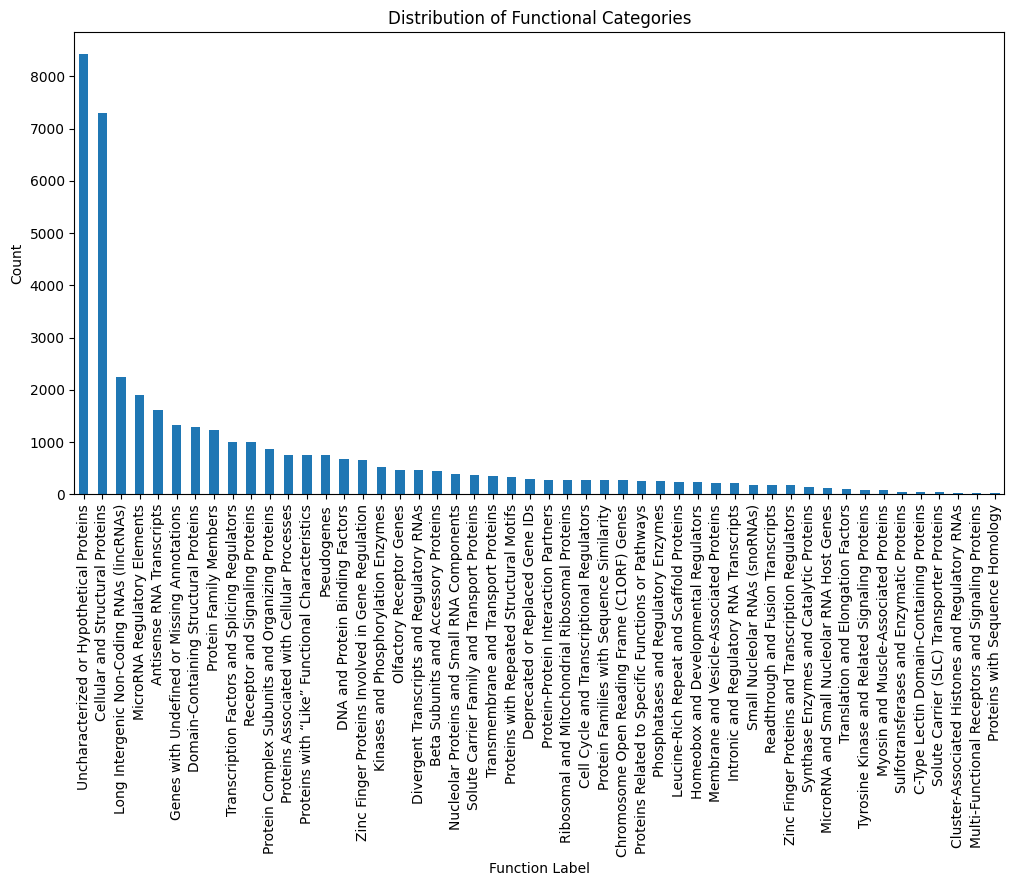

In [17]:
import matplotlib.pyplot as plt

# Plot the distribution of functional categories
label_counts = df['function_label'].value_counts()
label_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Functional Categories')
plt.xlabel('Function Label')
plt.ylabel('Count')
plt.show()